In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.neighbors import NearestNeighbors
from scipy import ndarray
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
colors=['lightgray','blue','orchid','red','green','purple','navy','violet','darkorange','gray','gray','gray','lawngreen','darkmagenta','black','thistle','indianred']
current_palette = sns.color_palette(colors)

In [3]:
filename='preprocessed_majority.csv'
datapd_0=pd.read_csv(filename, index_col=0)

In [4]:
filename='preprocessed_minority.csv'
datapd_1=pd.read_csv(filename, index_col=0 )

In [5]:
filename='preprocessed_val_1.csv'
dataval_1=pd.read_csv(filename, index_col=0)

In [6]:
filename='preprocessed_val_2.csv'
dataval_2=pd.read_csv(filename, index_col=0)

In [7]:
print('Majority class dataframe shape:', datapd_0.shape)
print('Minority class dataframe shape:', datapd_1.shape)

Majority class dataframe shape: (16383, 99)
Minority class dataframe shape: (625, 99)


In [8]:
n_feat=datapd_0.shape[1]

In [9]:
print('Imbalance Ratio:', datapd_0.shape[0]/datapd_1.shape[0])

Imbalance Ratio: 26.2128


In [10]:
features_0_trn=np.asarray(datapd_0)
features_1_trn=np.asarray(datapd_1)

In [11]:
features_val1=np.asarray(dataval_1)
features_val2=np.asarray(dataval_2)

In [12]:
def knn(X_train,y_train,X_test):
    from sklearn import metrics
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import f1_score
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import balanced_accuracy_score    
    knn = KNeighborsClassifier(n_neighbors=10)
    knn.fit(X_train, y_train)
    y_pred= knn.predict(X_test)
    return(y_pred)

In [13]:
def Neb_grps(data,near_neb):
    nbrs = NearestNeighbors(n_neighbors=near_neb, algorithm='ball_tree').fit(data)
    distances, indices = nbrs.kneighbors(data)
    neb_class=[]
    for i in (indices):
        neb_class.append(i)
    return(np.asarray(neb_class)) 

def LoRAS(data,num_samples,shadow,sigma,num_RACOS,num_afcomb):
    np.random.seed(42)
    data_shadow=([])
    for i in range (num_samples):
        c=0
        while c<shadow:
            data_shadow.append(data[i]+np.random.normal(0,sigma))
            c=c+1
    data_shadow==np.asarray(data_shadow)
    data_shadow_lc=([])
    for i in range(num_RACOS):
        idx = np.random.randint(shadow*num_samples, size=num_afcomb)
        w=np.random.randint(100, size=len(idx))
        aff_w=np.asarray(w/sum(w))
        data_tsl=np.array(data_shadow)[idx,:]
        data_tsl_=np.dot(aff_w, data_tsl)
        data_shadow_lc.append(data_tsl_)
    return(np.asarray(data_shadow_lc))   

def LoRAS_gen(num_samples,shadow,sigma,num_RACOS,num_afcomb):
    RACOS_set=[]
    for i in range (len(nb_list)):
        RACOS_i= LoRAS(features_1_trn[nb_list[i]],num_samples,shadow,sigma,num_RACOS,num_afcomb)
        RACOS_set.append(RACOS_i)
    LoRAS_set=np.asarray(RACOS_set)
    LoRAS_1=np.reshape(LoRAS_set,(len(features_1_trn)*num_RACOS,n_feat))
    return(np.concatenate((LoRAS_1,features_1_trn)))

### Without preprocessing

In [14]:
features=np.concatenate((features_1_trn,features_0_trn))
labels=np.concatenate((np.zeros(len(features_1_trn))+1, np.zeros(len(features_0_trn))))

In [15]:
%%time
y_pred_norm1=knn(features,labels,features_val1)

predicted_minority_val1=np.asarray(dataval_1.index.to_list())[np.where(y_pred_norm1==1)]

with open('predict_val1_100_norm.txt', 'w') as f:
    for item in predicted_minority_val1:
        f.write("%s\n" % item)


Wall time: 17.7 s


In [16]:
%%time
y_pred_norm2=knn(features,labels,features_val2)

predicted_minority_val2=np.asarray(dataval_2.index.to_list())[np.where(y_pred_norm2==1)]

with open('predict_val2_100_norm.txt', 'w') as f:
    for item in predicted_minority_val2:
        f.write("%s\n" % item)

Wall time: 29.6 s


In [17]:
import umap.umap_ as umap
data_embedded = umap.UMAP(n_neighbors=5, min_dist=0.01, n_components=2, metric='euclidean', random_state=11).fit_transform(features)
data_embedded[:,0]=(data_embedded[:,0]- np.mean(data_embedded[:,0]))/np.std(data_embedded[:,0])
data_embedded[:,1]=(data_embedded[:,1]- np.mean(data_embedded[:,1]))/np.std(data_embedded[:,1])
data_embedded.shape
result = pd.DataFrame(data = data_embedded , 
        columns = ['UMAP_0', 'UMAP_1'])
result['Cluster'] = labels

C:\Users\admin\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\Anaconda3\lib\site-packages\umap\rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
C:\Users\admin\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\Anaconda3\lib\site-packages\umap\rp_tree.py", line 135:
@numba.njit(fas

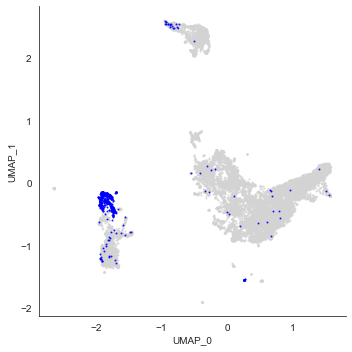

In [18]:
sns.set_style('white')
sns.lmplot( x="UMAP_0", y="UMAP_1",
  data=result, 
  fit_reg=False, 
  legend=False,
  hue='Cluster', # color by cluster
  scatter_kws={"s": 1},  palette=current_palette, height=5, aspect=1) # specify the point size
plt.tight_layout()
plt.savefig('cluster11_100_no_oversampling.png',dpi=600)

### LoRAS overampling

In [56]:
%%time
num_samples=30
shadow=100
sigma=.005
num_RACOS=(len(features_0_trn)-len(features_1_trn))//len(features_1_trn)
num_afcomb=50
nb_list=Neb_grps(features_1_trn, num_samples)
    
LoRAS_1=LoRAS_gen(num_samples,shadow,sigma,num_RACOS,num_afcomb)
LoRAS_train=np.concatenate((LoRAS_1,features_0_trn))
LoRAS_labels=np.concatenate((np.zeros(len(LoRAS_1))+1, np.zeros(len(features_0_trn))))
    


Wall time: 47.1 s


In [57]:
%%time
predicted_labels_val_1=knn(LoRAS_train,LoRAS_labels,features_val1)   

predicted_minority_val1=np.asarray(dataval_1.index.to_list())[np.where(predicted_labels_val_1==1)]

with open('predict_val1_100_LoRAS.txt', 'w') as f:
    for item in predicted_minority_val1:
        f.write("%s\n" % item)

Wall time: 21.6 s


In [58]:
%%time
num_samples=30
shadow=100
sigma=.005
num_RACOS=(len(features_0_trn)-len(features_1_trn))//len(features_1_trn)
num_afcomb=50
nb_list=Neb_grps(features_1_trn, num_samples)
    
LoRAS_1=LoRAS_gen(num_samples,shadow,sigma,num_RACOS,num_afcomb)
LoRAS_train=np.concatenate((LoRAS_1,features_0_trn))
LoRAS_labels=np.concatenate((np.zeros(len(LoRAS_1))+1, np.zeros(len(features_0_trn))))
    
 

Wall time: 45.4 s


In [59]:
%%time
predicted_labels_val_2=knn(LoRAS_train,LoRAS_labels,features_val2)  

predicted_minority_val2=np.asarray(dataval_2.index.to_list())[np.where(predicted_labels_val_2==1)]

with open('predict_val2_100_LORAS.txt', 'w') as f:
    for item in predicted_minority_val2:
        f.write("%s\n" % item)

Wall time: 35.1 s


In [23]:
np.random.seed(42)
feats=np.concatenate((LoRAS_train[np.where(LoRAS_labels==1)][np.random.choice(len(LoRAS_train[np.where(LoRAS_labels==1)]), 2000, replace=False)], LoRAS_train[np.where(LoRAS_labels==0)]))
labs=np.concatenate((np.zeros(2000)+1,np.zeros(len(LoRAS_train[np.where(LoRAS_labels==0)]))))


In [24]:
data_embedded = umap.UMAP(n_neighbors=5, min_dist=0.01, n_components=2, metric='euclidean', random_state=11).fit_transform(feats)
data_embedded[:,0]=(data_embedded[:,0]- np.mean(data_embedded[:,0]))/np.std(data_embedded[:,0])
data_embedded[:,1]=(data_embedded[:,1]- np.mean(data_embedded[:,1]))/np.std(data_embedded[:,1])
data_embedded.shape
result = pd.DataFrame(data = data_embedded , 
        columns = ['UMAP_0', 'UMAP_1'])
result['Cluster'] = labs



C:\Users\admin\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\Anaconda3\lib\site-packages\umap\rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
C:\Users\admin\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\Anaconda3\lib\site-packages\umap\rp_tree.py", line 135:
@numba.njit(fas

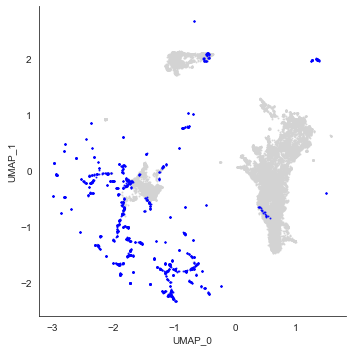

In [25]:
sns.set_style('white')
sns.lmplot( x="UMAP_0", y="UMAP_1",
  data=result, 
  fit_reg=False, 
  legend=False,
  hue='Cluster', # color by cluster
  scatter_kws={"s": 1},  palette=current_palette, height=5, aspect=1) # specify the point size
plt.tight_layout()
plt.savefig('cluster11_100_LoRAS.png',dpi=600)

### SMOTE oversampling

In [26]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=62, k_neighbors=10,  kind='regular',ratio=1)
SMOTE_feat, SMOTE_labels = sm.fit_resample(features,labels)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

In [27]:
%%time
predicted_labels_val_1=knn(SMOTE_feat, SMOTE_labels, features_val1)   

predicted_minority_val1=np.asarray(dataval_1.index.to_list())[np.where(predicted_labels_val_1==1)]

with open('predict_val1_100_SMOTE.txt', 'w') as f:
    for item in predicted_minority_val1:
        f.write("%s\n" % item)

Wall time: 24.4 s


In [28]:
%%time
predicted_labels_val_2=knn(SMOTE_feat, SMOTE_labels, features_val2)  

predicted_minority_val2=np.asarray(dataval_2.index.to_list())[np.where(predicted_labels_val_2==1)]

with open('predict_val2_100_SMOTE.txt', 'w') as f:
    for item in predicted_minority_val2:
        f.write("%s\n" % item)

Wall time: 50.9 s


In [29]:
np.random.seed(42)
feats=np.concatenate((SMOTE_feat[np.where(SMOTE_labels==1)][np.random.choice(len(SMOTE_feat[np.where(SMOTE_labels==1)]), 2000, replace=False)], SMOTE_feat[np.where(SMOTE_labels==0)]))
labs=np.concatenate((np.zeros(2000)+1,np.zeros(len(SMOTE_feat[np.where(SMOTE_labels==0)]))))

In [30]:
data_embedded = umap.UMAP(n_neighbors=5, min_dist=0.01, n_components=2, metric='euclidean', random_state=11).fit_transform(feats)
data_embedded[:,0]=(data_embedded[:,0]- np.mean(data_embedded[:,0]))/np.std(data_embedded[:,0])
data_embedded[:,1]=(data_embedded[:,1]- np.mean(data_embedded[:,1]))/np.std(data_embedded[:,1])
data_embedded.shape
result = pd.DataFrame(data = data_embedded , 
        columns = ['UMAP_0', 'UMAP_1'])
result['Cluster'] = labs


C:\Users\admin\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\Anaconda3\lib\site-packages\umap\nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
C:\Users\admin\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 7 separate connected components using meta-embedding (experimental)
  n_components


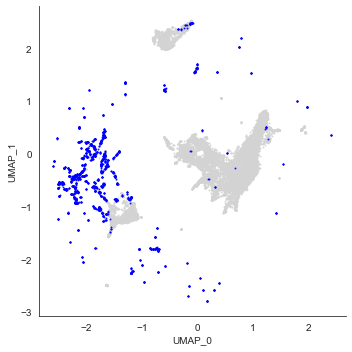

In [31]:
sns.set_style('white')
sns.lmplot( x="UMAP_0", y="UMAP_1",
  data=result, 
  fit_reg=False, 
  legend=False,
  hue='Cluster', # color by cluster
  scatter_kws={"s": 1},  palette=current_palette, height=5, aspect=1) # specify the point size
plt.tight_layout()
plt.savefig('cluster11_100_SMOTE.png',dpi=600)

### SMOTE bl1 oversampling

In [32]:
from imblearn.over_sampling import SMOTE 
smbl1 = SMOTE(random_state=62, k_neighbors=10,  kind='borderline1',ratio=1)
SMOTE_feat_bl1, SMOTE_labels_bl1 = smbl1.fit_resample(features,labels)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [33]:
%%time
predicted_labels_val_1=knn(SMOTE_feat_bl1, SMOTE_labels_bl1, features_val1)   

predicted_minority_val1=np.asarray(dataval_1.index.to_list())[np.where(predicted_labels_val_1==1)]

with open('predict_val1_100_SMOTE_bl1.txt', 'w') as f:
    for item in predicted_minority_val1:
        f.write("%s\n" % item)

Wall time: 30.8 s


In [34]:
%%time
predicted_labels_val_2=knn(SMOTE_feat_bl1, SMOTE_labels_bl1, features_val2)  

predicted_minority_val2=np.asarray(dataval_2.index.to_list())[np.where(predicted_labels_val_2==1)]

with open('predict_val2_100_SMOTE_bl1.txt', 'w') as f:
    for item in predicted_minority_val2:
        f.write("%s\n" % item)

Wall time: 51.8 s


### SMOTE bl2 oversampling

In [35]:
smbl2 = SMOTE(random_state=62, k_neighbors=10,  kind='borderline2',ratio=1)
SMOTE_feat_bl2, SMOTE_labels_bl2 = smbl1.fit_resample(features,labels)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [36]:
%%time
predicted_labels_val_1=knn(SMOTE_feat_bl2, SMOTE_labels_bl2, features_val1)   

predicted_minority_val1=np.asarray(dataval_1.index.to_list())[np.where(predicted_labels_val_1==1)]

with open('predict_val1_100_SMOTE_bl2.txt', 'w') as f:
    for item in predicted_minority_val1:
        f.write("%s\n" % item)

Wall time: 29.6 s


In [37]:
%%time
predicted_labels_val_2=knn(SMOTE_feat_bl2, SMOTE_labels_bl2, features_val2)  

predicted_minority_val2=np.asarray(dataval_2.index.to_list())[np.where(predicted_labels_val_2==1)]

with open('predict_val2_100_SMOTE_bl2.txt', 'w') as f:
    for item in predicted_minority_val2:
        f.write("%s\n" % item)

Wall time: 55.3 s


### SMOTE SVM oversampling

In [38]:
smsvm = SMOTE(random_state=62, k_neighbors=10,  kind='svm',ratio=1)
SMOTE_feat_svm, SMOTE_labels_svm = smsvm.fit_resample(features,labels)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, cate

In [39]:
%%time
predicted_labels_val_1=knn(SMOTE_feat_svm, SMOTE_labels_svm, features_val1)   

predicted_minority_val1=np.asarray(dataval_1.index.to_list())[np.where(predicted_labels_val_1==1)]

with open('predict_val1_100_SMOTE_svm.txt', 'w') as f:
    for item in predicted_minority_val1:
        f.write("%s\n" % item)

Wall time: 30.6 s


In [40]:
%%time
predicted_labels_val_2=knn(SMOTE_feat_svm, SMOTE_labels_svm, features_val2)  

predicted_minority_val2=np.asarray(dataval_2.index.to_list())[np.where(predicted_labels_val_2==1)]

with open('predict_val2_100_SMOTE_svm2.txt', 'w') as f:
    for item in predicted_minority_val2:
        f.write("%s\n" % item)

Wall time: 55.8 s


### ADASYN oversampling

In [41]:
from imblearn.over_sampling import ADASYN
ad = ADASYN(random_state=62,n_neighbors=10,  ratio=1)
ADASYN_feat, ADASYN_labels = ad.fit_resample(features, labels)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [42]:
%%time
predicted_labels_val_1=knn(ADASYN_feat, ADASYN_labels, features_val1)   

predicted_minority_val1=np.asarray(dataval_1.index.to_list())[np.where(predicted_labels_val_1==1)]

with open('predict_val1_100_ADASYN.txt', 'w') as f:
    for item in predicted_minority_val1:
        f.write("%s\n" % item)

Wall time: 33.3 s


In [43]:
%%time
predicted_labels_val_2=knn(ADASYN_feat, ADASYN_labels, features_val2)  

predicted_minority_val2=np.asarray(dataval_2.index.to_list())[np.where(predicted_labels_val_2==1)]

with open('predict_val2_100_ADASYN.txt', 'w') as f:
    for item in predicted_minority_val2:
        f.write("%s\n" % item)

Wall time: 1min 5s
